In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filePath = 'data/rock_density_xray.csv'
data = pd.read_csv(filePath)
data.head() 

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [6]:
# Rename the columns
data.columns=['Signal',"Density"]

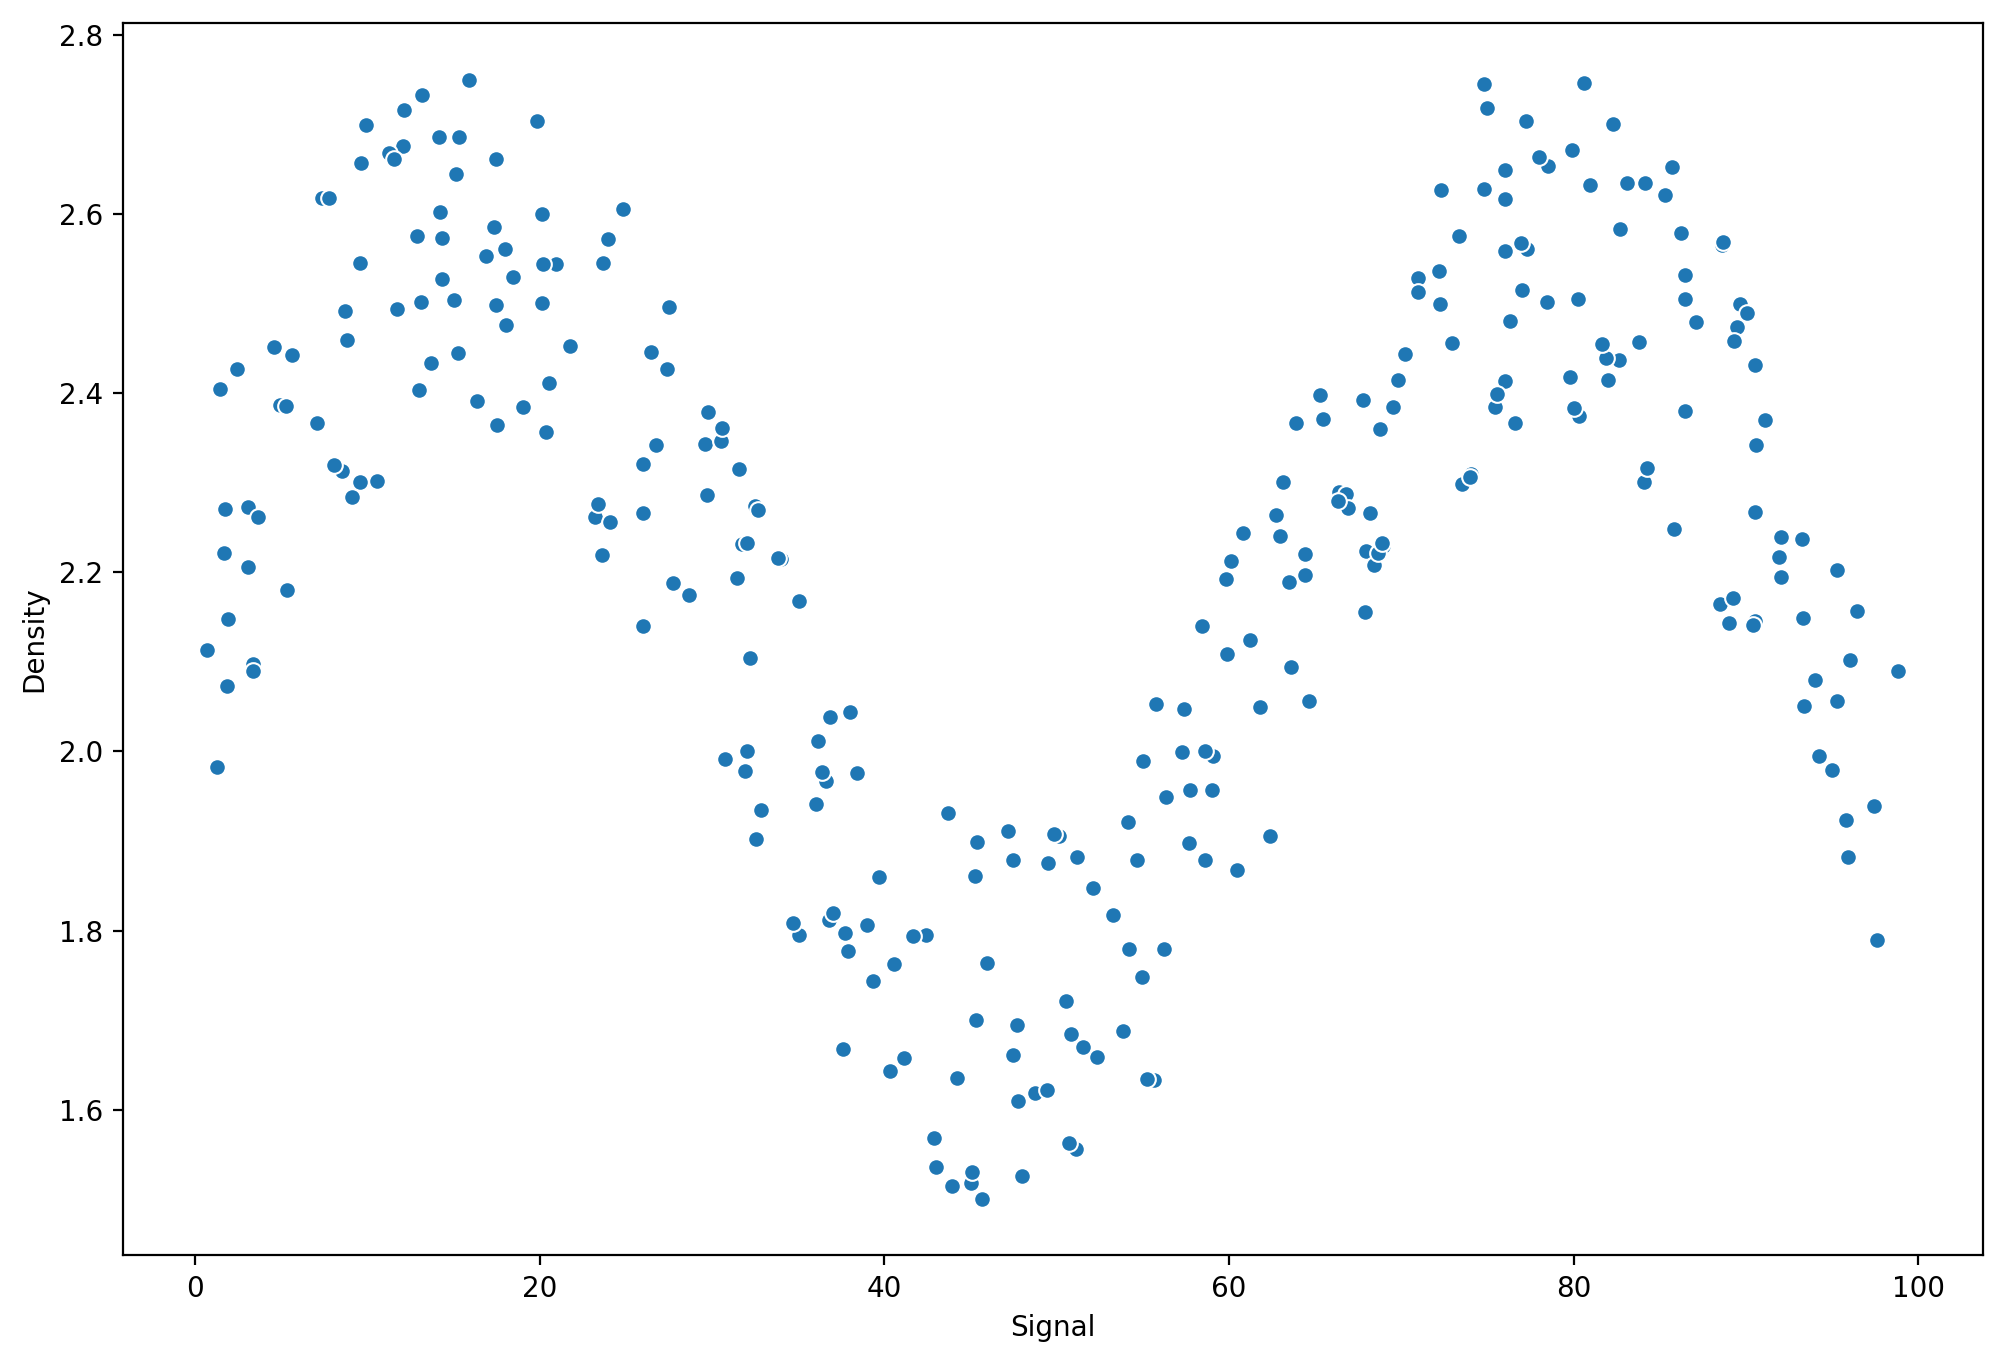

In [8]:
# Creating a scatter plot
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=data)

## Splitting the Data

In [17]:
# Get the X and y dataset
X = data['Signal'].values.reshape(-1,1)   
y = data['Density'] 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_model = LinearRegression() 

In [22]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
linear_preds = linear_model.predict(X_test) 

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
np.sqrt(mean_squared_error(y_test,linear_preds))

0.2570051996584629

In [27]:
signal_range = np.arange(0,100)

In [28]:
linear_output = linear_model.predict(signal_range.reshape(-1,1))

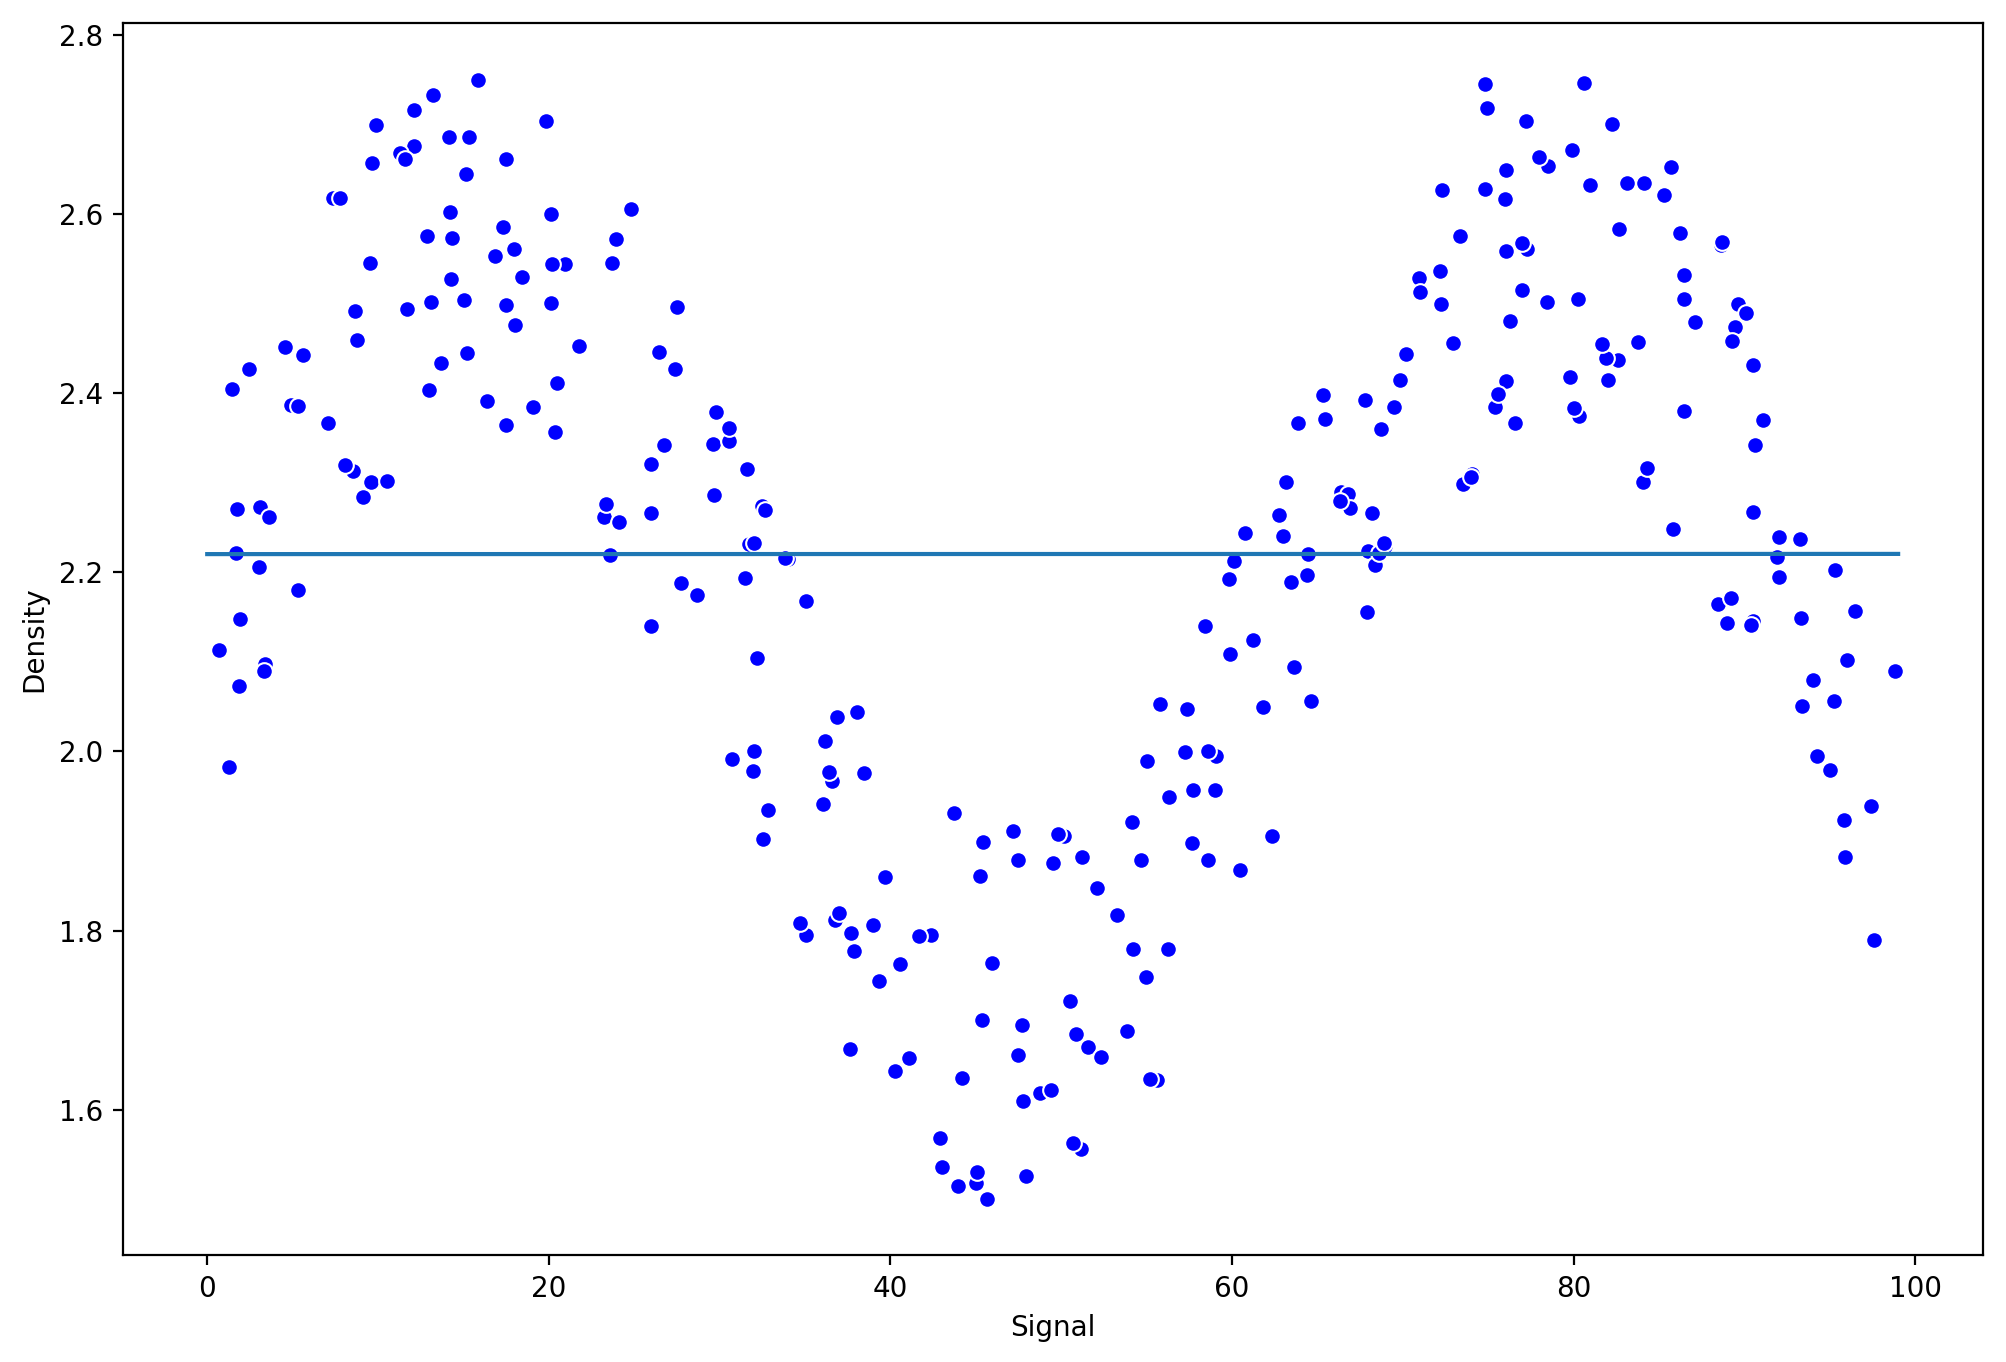

In [31]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=data,color='blue')
plt.plot(signal_range,linear_output)

# Polynomial Regression

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=data,color='blue')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


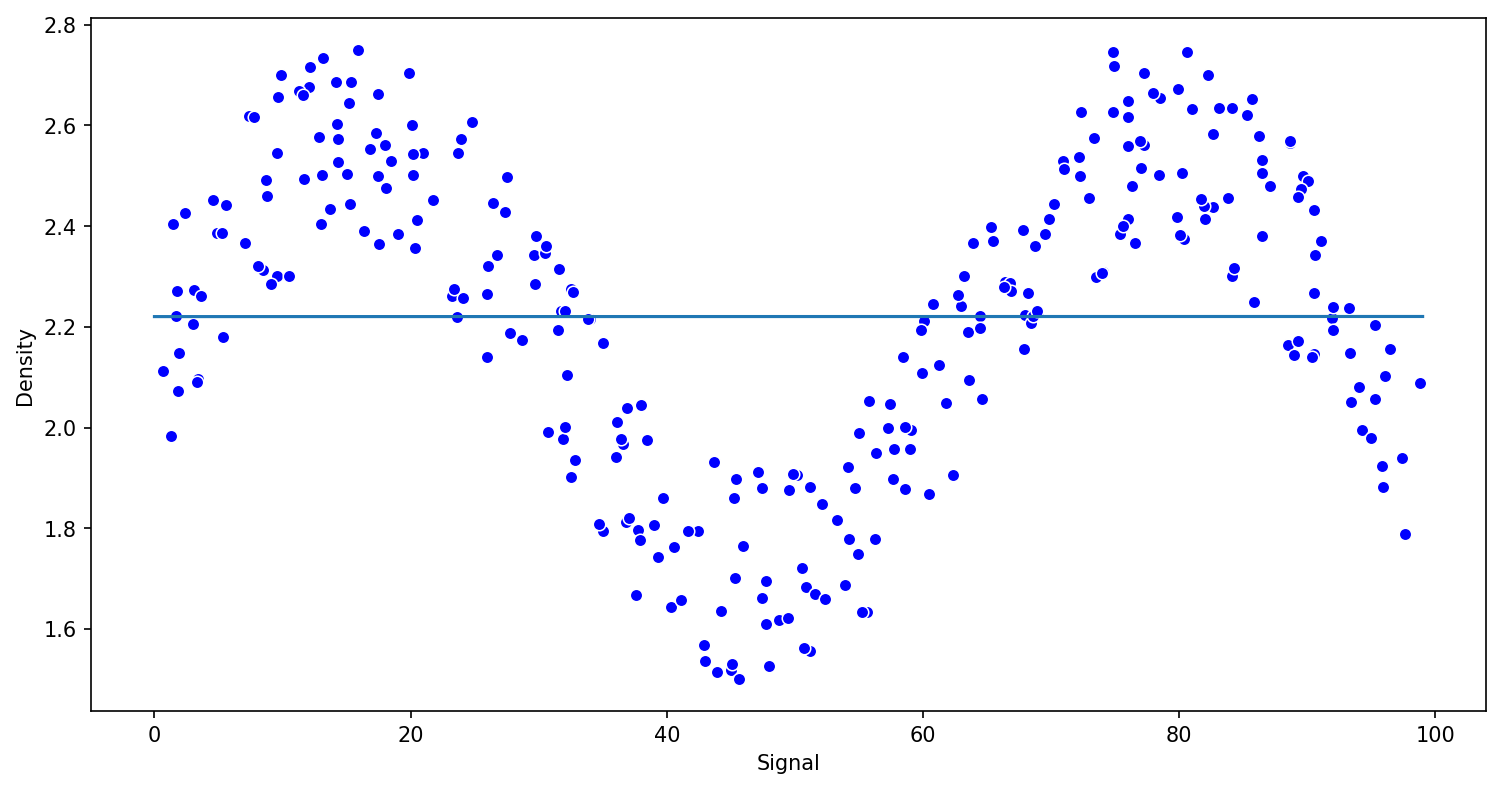

In [40]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [41]:
from sklearn.pipeline import make_pipeline

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


RMSE : 0.2817309563725583


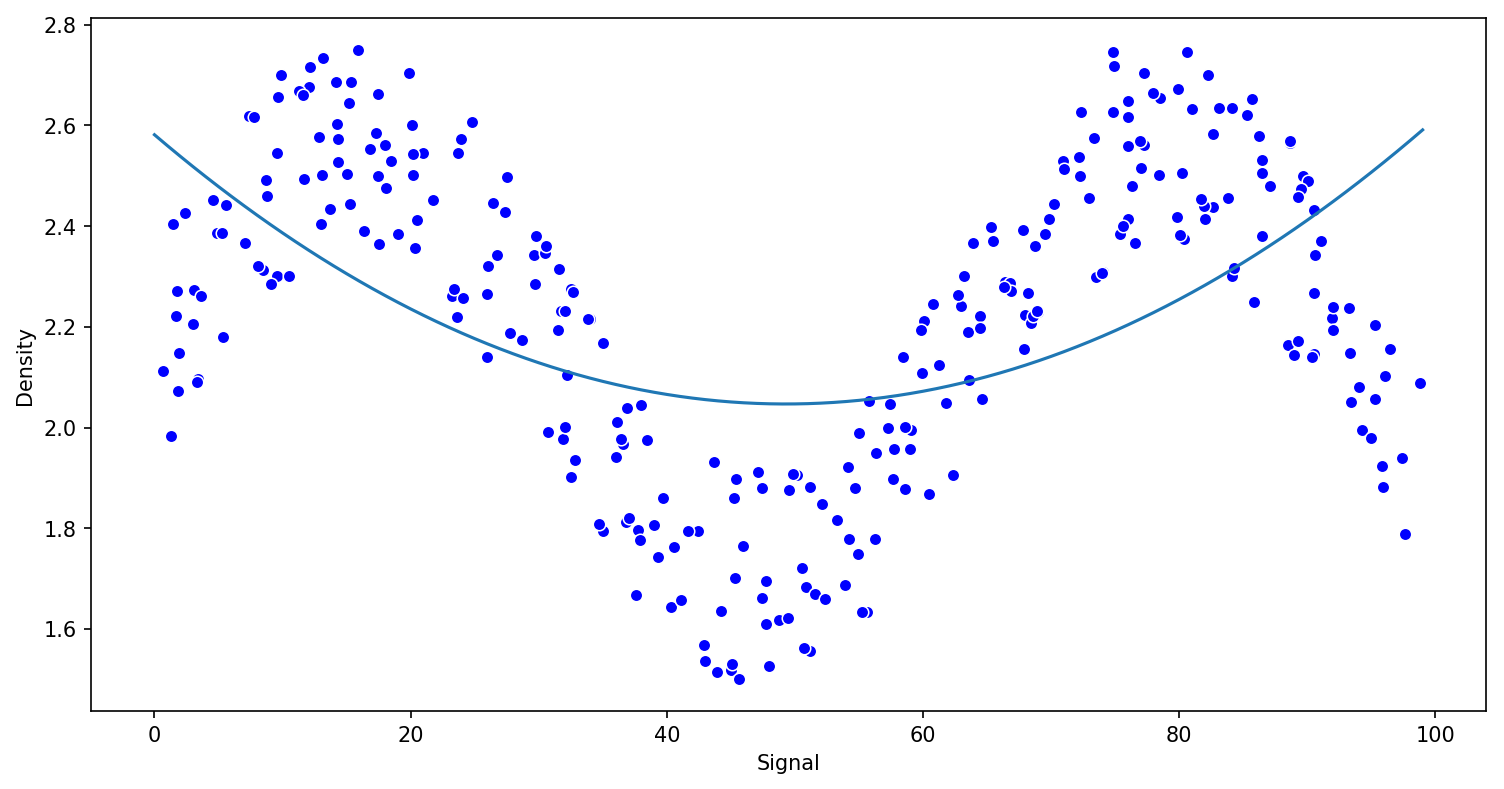

In [44]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


RMSE : 0.140252361302776


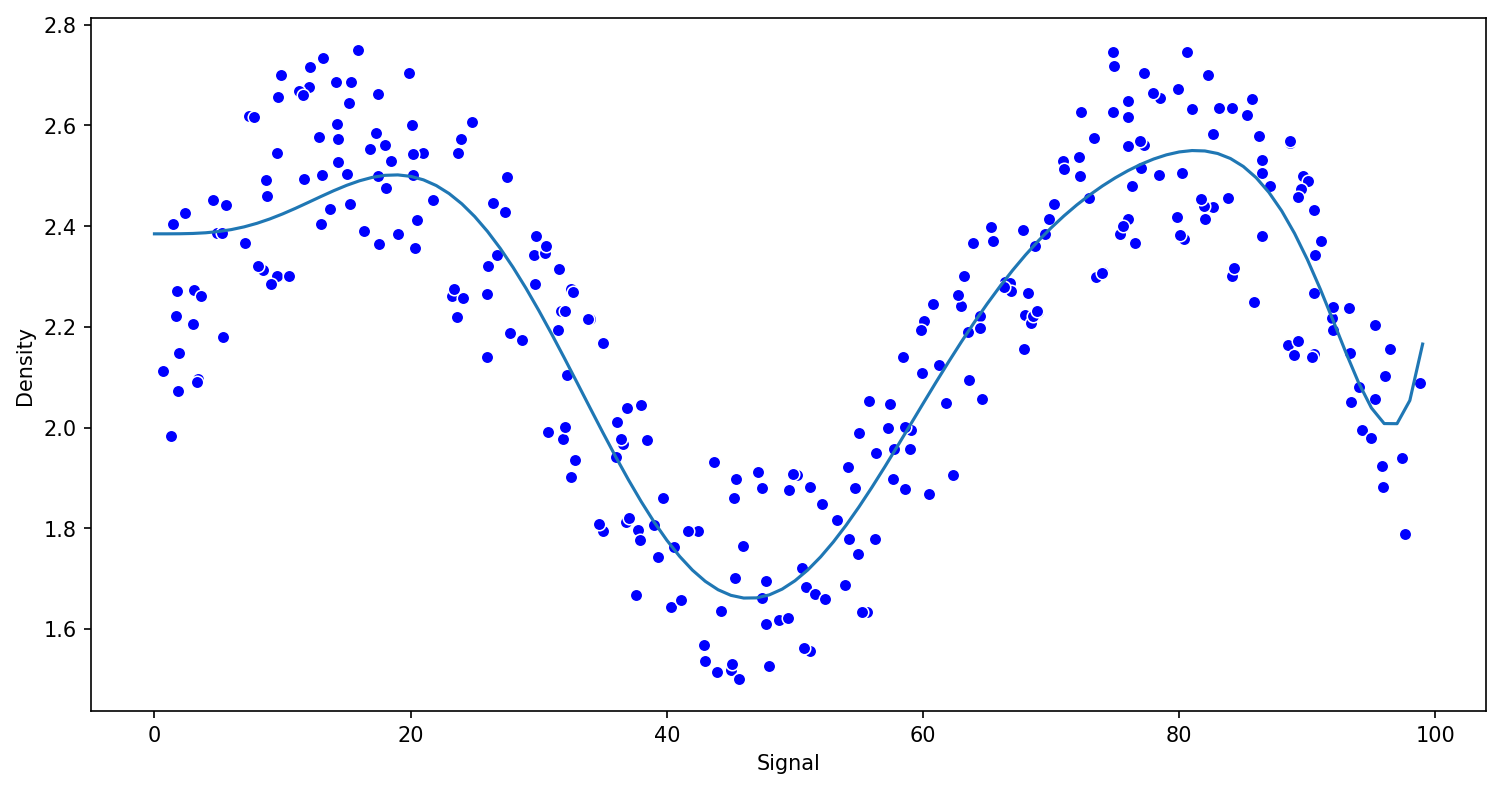

In [45]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## KNN Regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor

C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Anaconda3\envs\pytorchenv\lib\site-packages\s

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


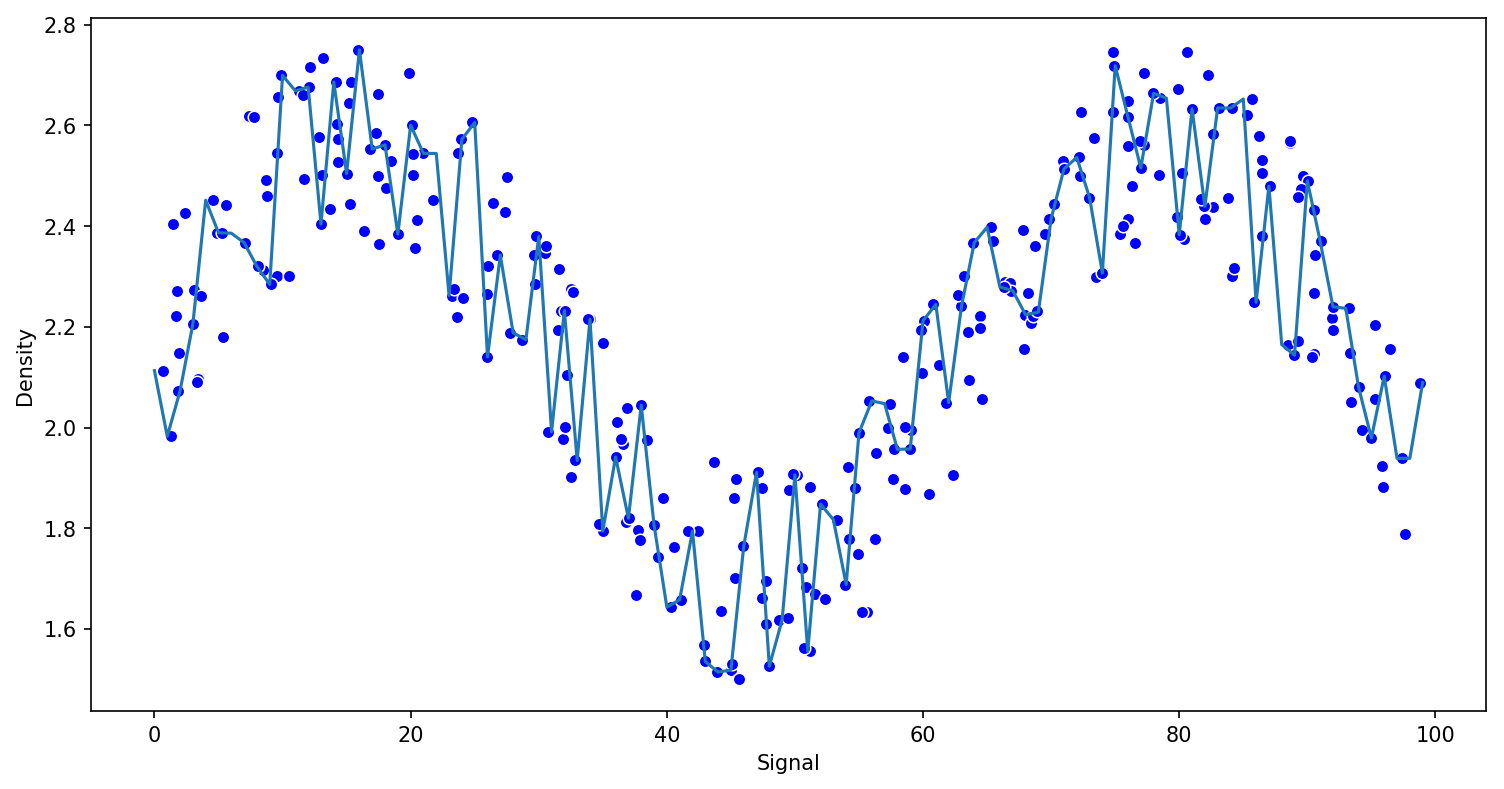

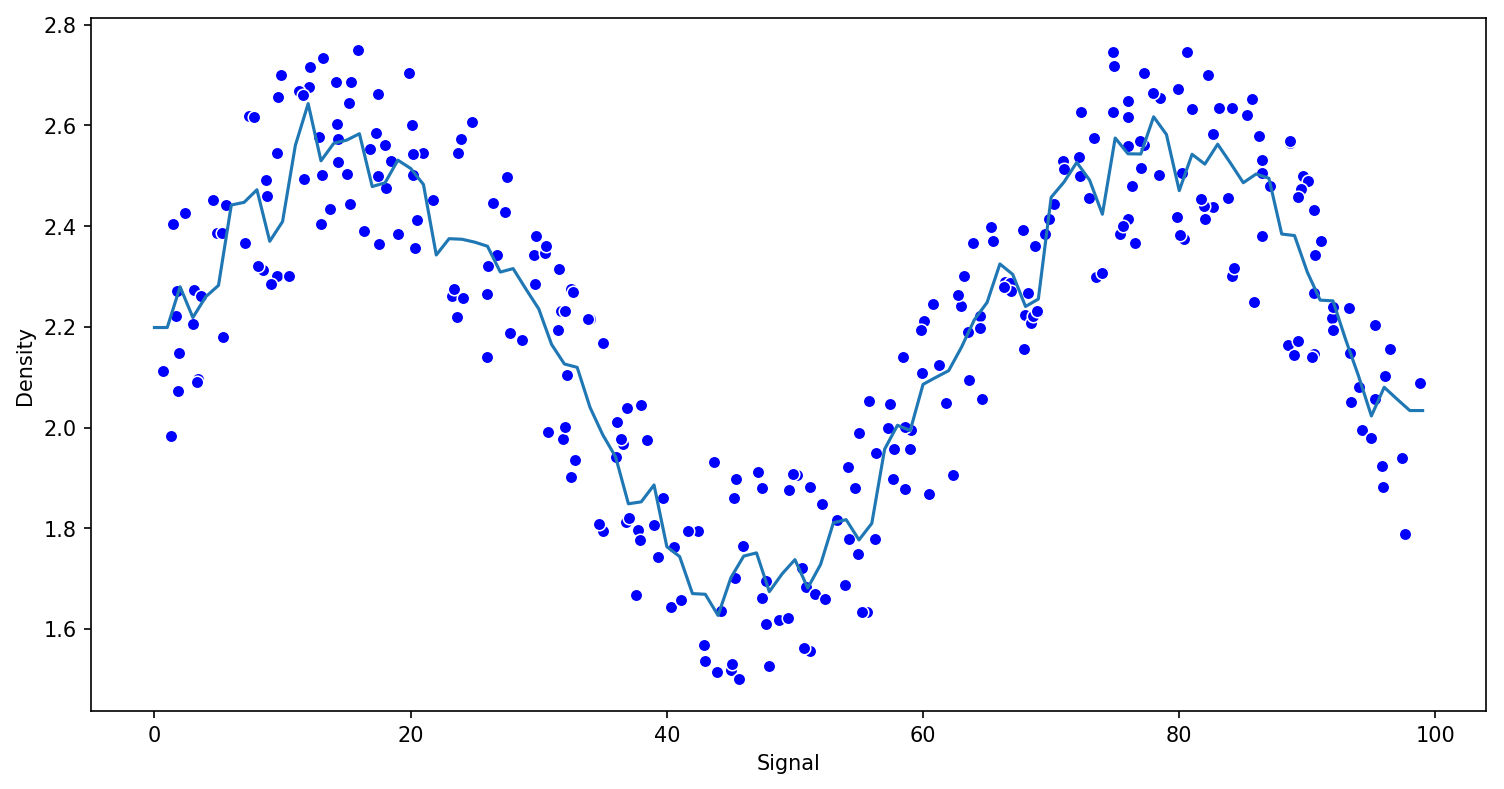

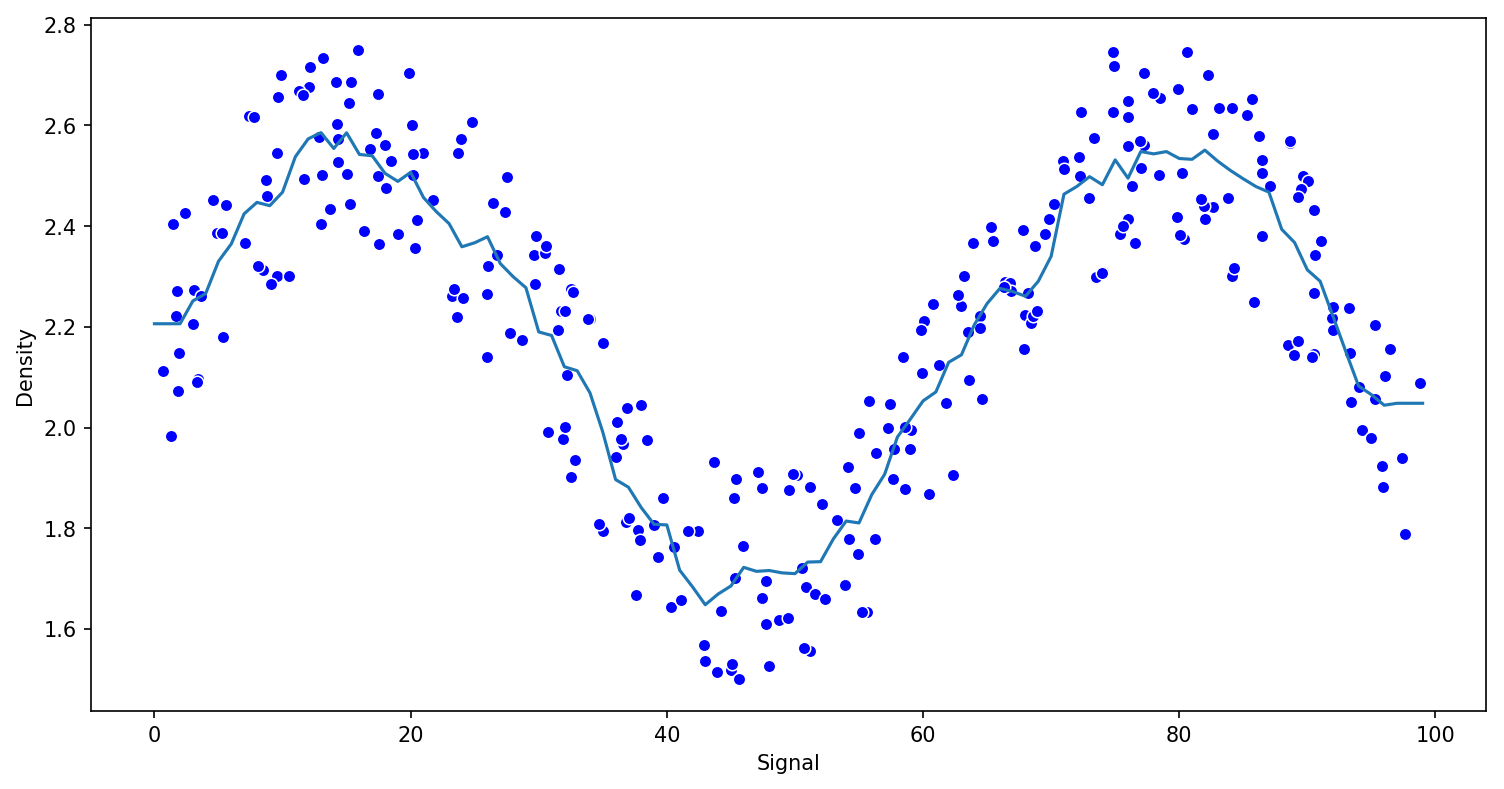

In [48]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.15234870286353372


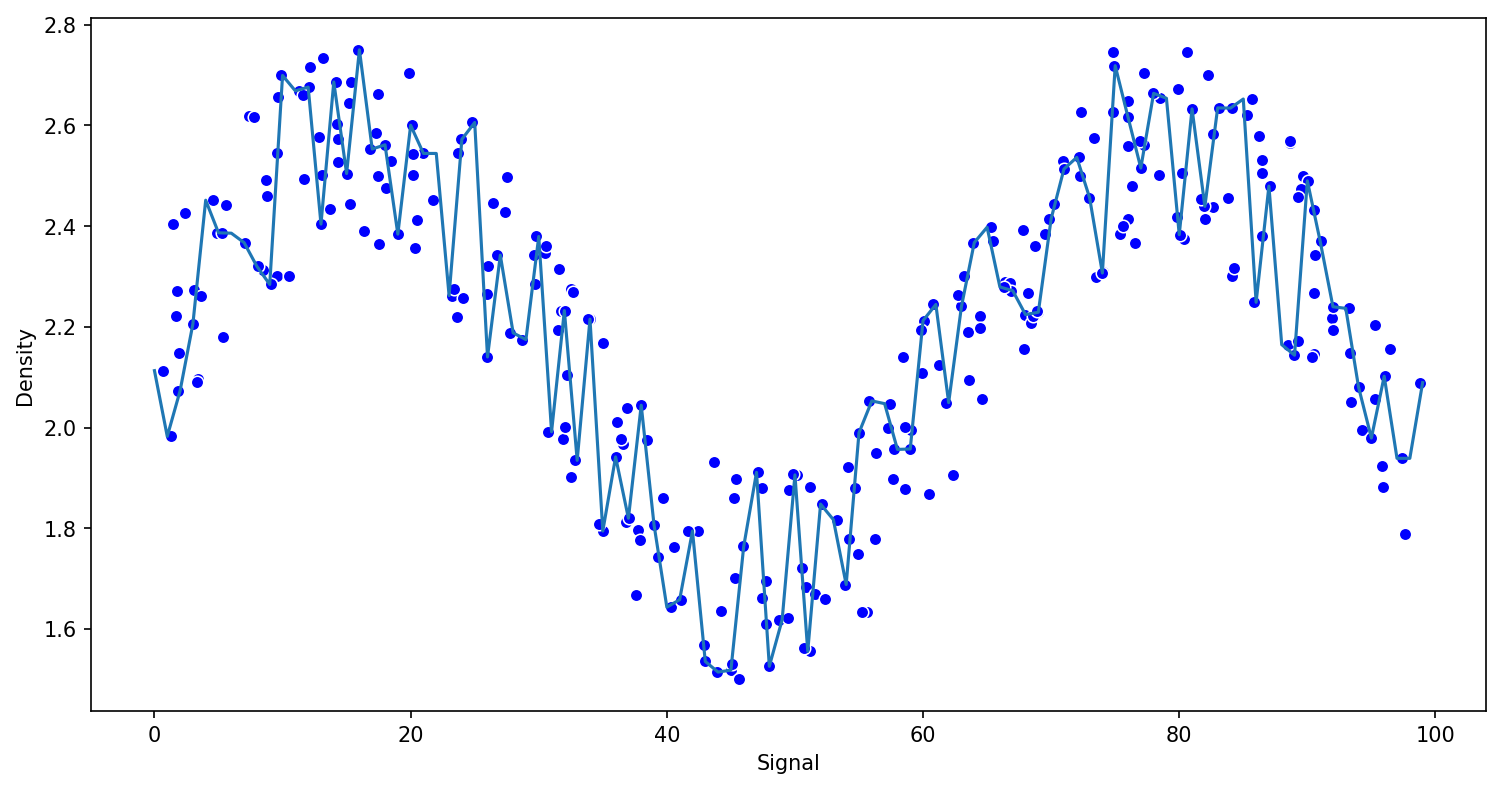

In [50]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Support Vector Regression

In [52]:
from sklearn.svm import SVR

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [55]:
grid = GridSearchCV(svr,param_grid)

C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RMSE : 0.13015742723602505


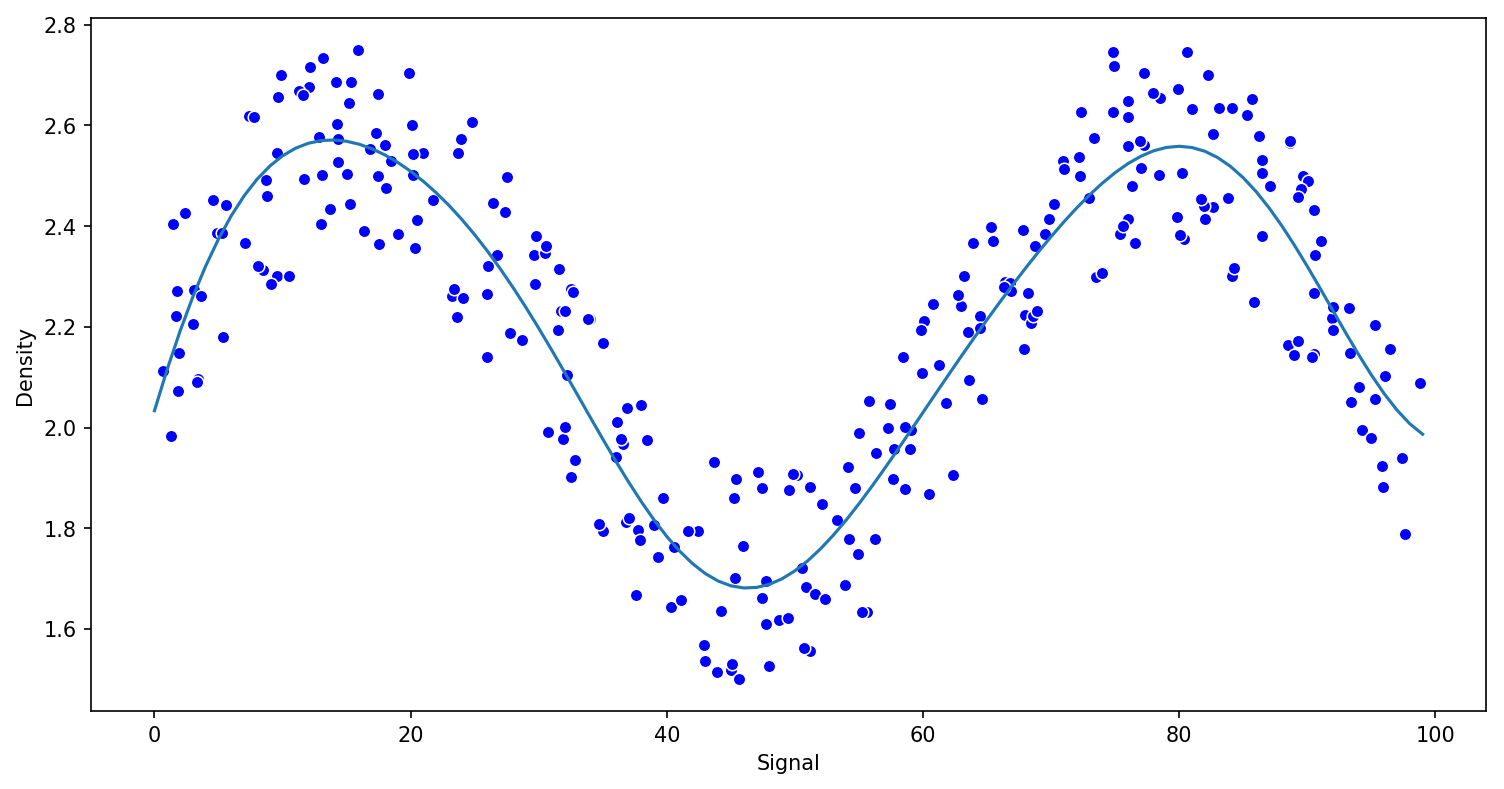

In [56]:
run_model(grid,X_train,y_train,X_test,y_test)

In [57]:
grid.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
# help(RandomForestRegressor)

C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are dep

RMSE : 0.14677386732153308
RMSE : 0.1334239456159944
RMSE : 0.13428056998135451


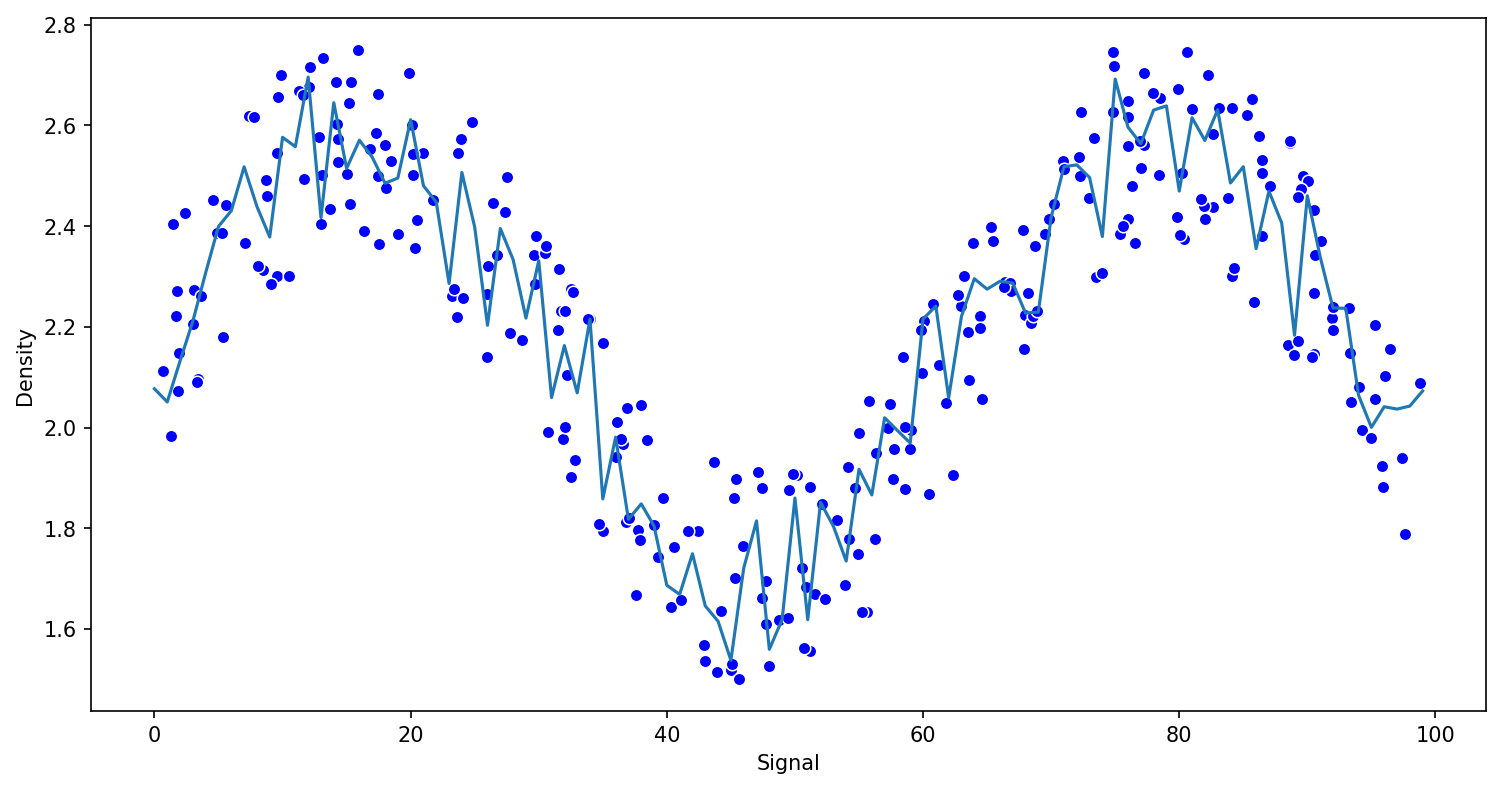

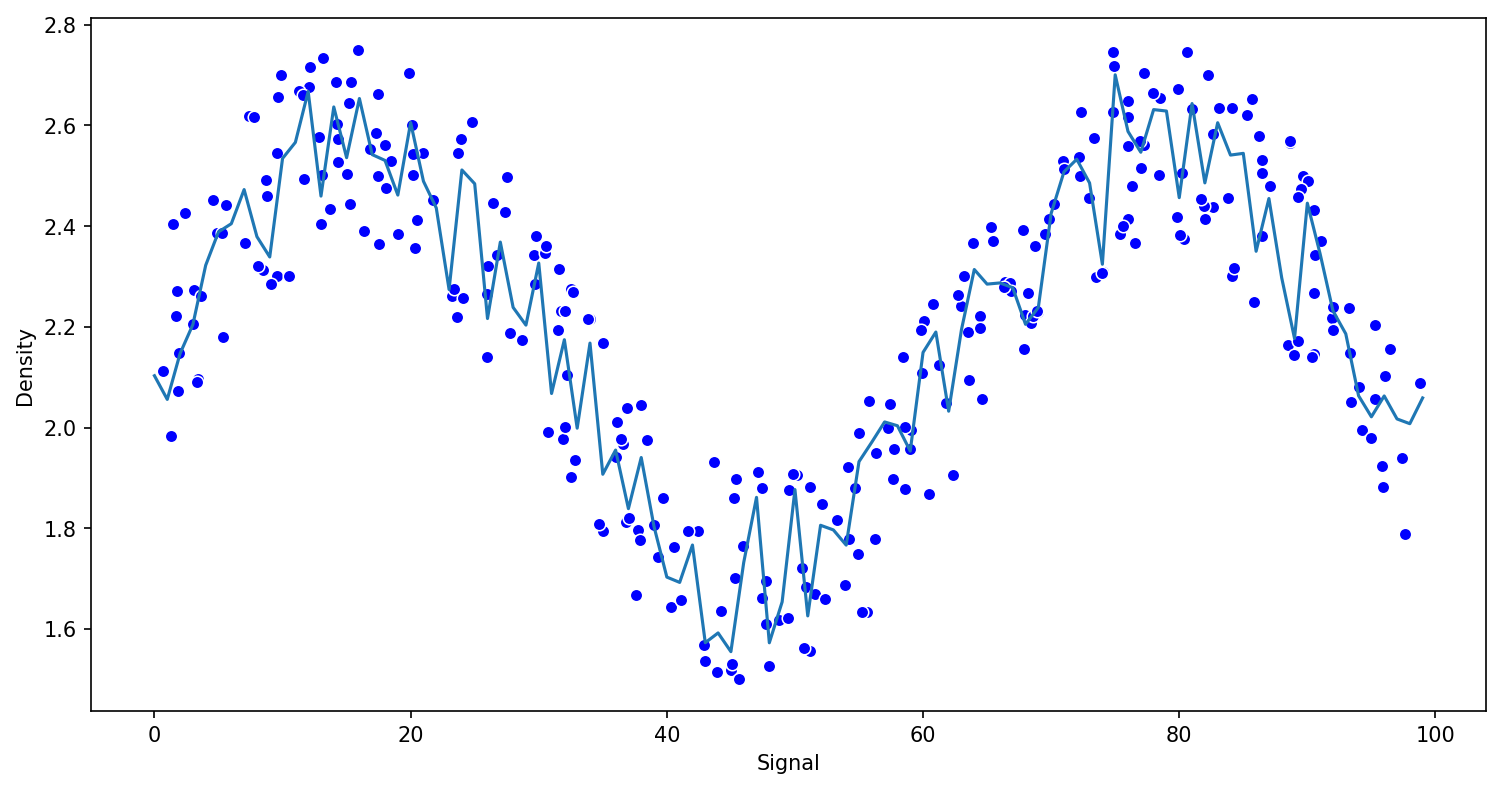

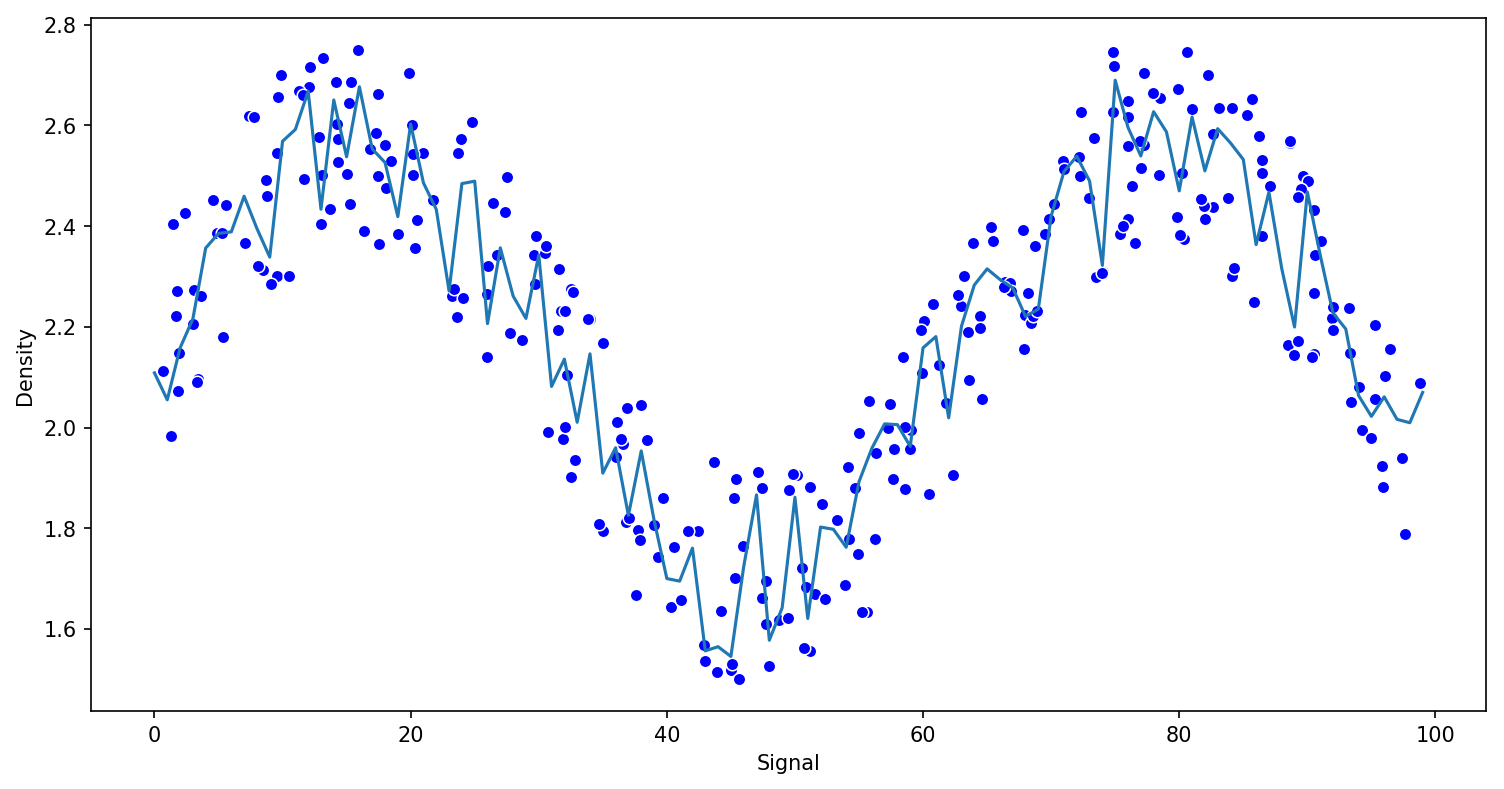

In [61]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [292]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


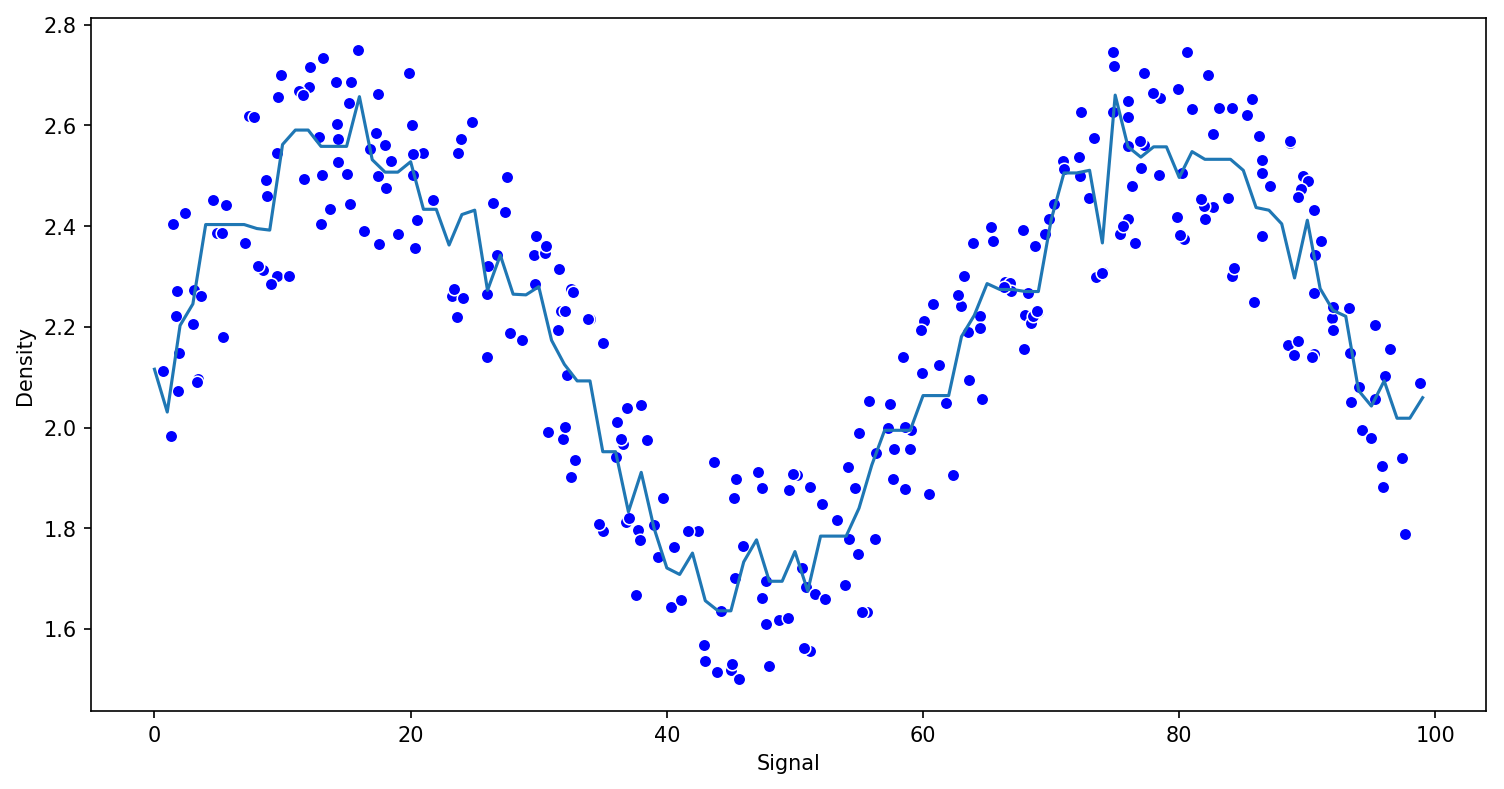

In [63]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [64]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


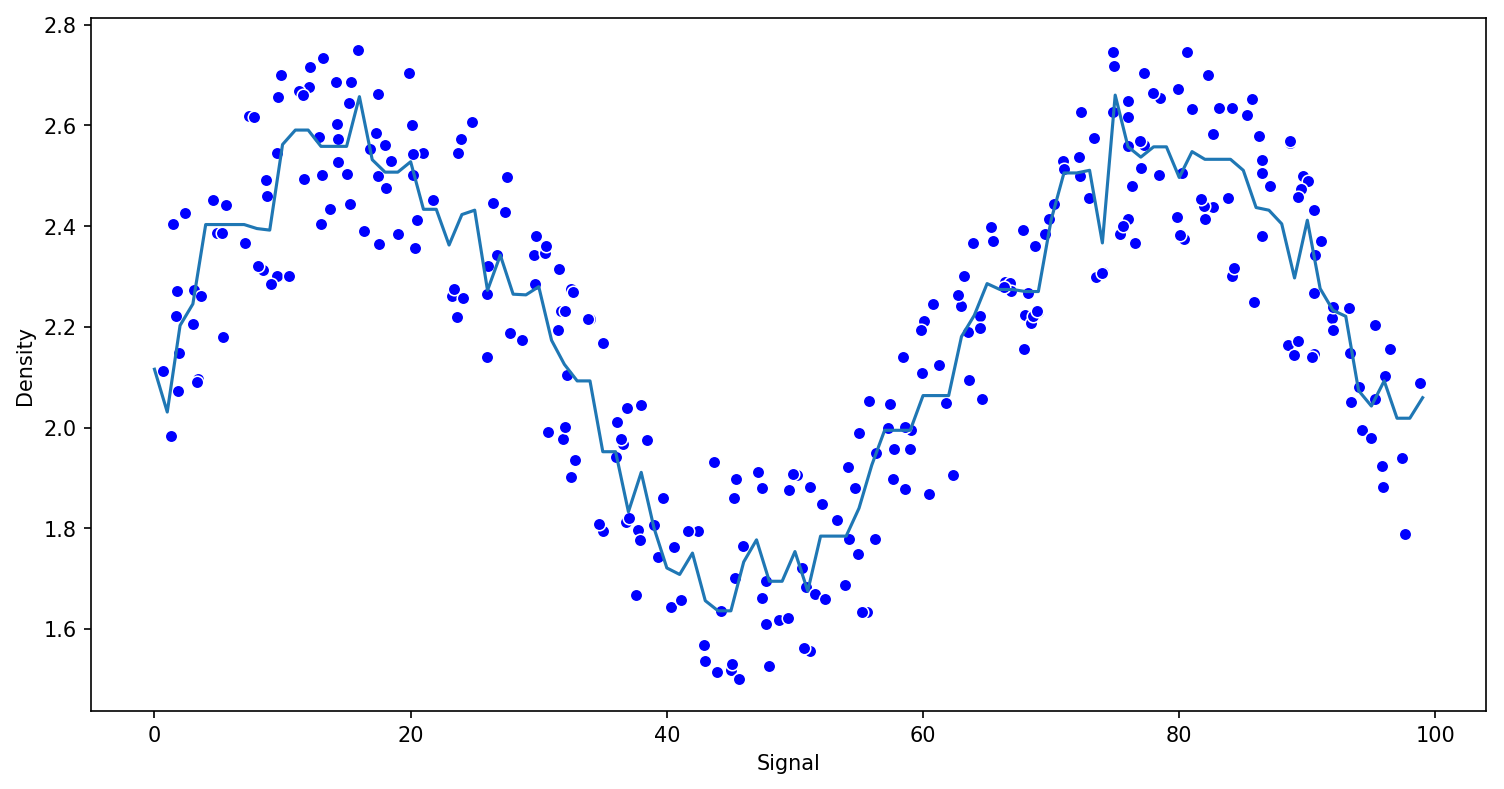

In [65]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----